### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook

### List of Directories

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Basic Models - Using Pipe Line - Removing Genres which has one records.ipynb',
 'Basic Models - Using Pipe Line .ipynb',
 'Basic Models.ipynb',
 'Markdown File.pdf',
 'movies_metadata.csv',
 'Visualization_Movies_Data.ipynb']

### Read the data

In [3]:
meta_data = pd.read_csv("movies_metadata.csv")

In [4]:
meta_data.shape
print("meta_data we have %s rows and %s Columns "%(meta_data.shape[0],meta_data.shape[1]))

meta_data we have 45466 rows and 24 Columns 


In [5]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
data = meta_data.loc[:, ['original_title','title','tagline','overview','genres']] 

In [7]:
data.head(5)

,original_title,title,tagline,overview,genres
0,Toy Story,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]"


In [8]:
data.shape

(45466, 5)

In [9]:
data.isnull().sum()

original_title        0
title                 6
tagline           25054
overview            954
genres                0
dtype: int64

In [10]:
import ast
data['genres'] = data['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [11]:
data.head()

,original_title,title,tagline,overview,genres
0,Toy Story,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,Jumanji,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,Waiting to Exhale,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,[Comedy]


In [12]:
genres = data['genres']
unique_genres =sum(genres,[])
unique = len(set(unique_genres))

In [13]:
import nltk
genres_u = nltk.FreqDist(unique_genres)
all_genres_df = pd.DataFrame({'Genre': list(genres_u.keys()),'Count': list(genres_u.values())})
g = all_genres_df.nlargest(columns="Count",n=unique)

In [14]:
g = pd.DataFrame(g)

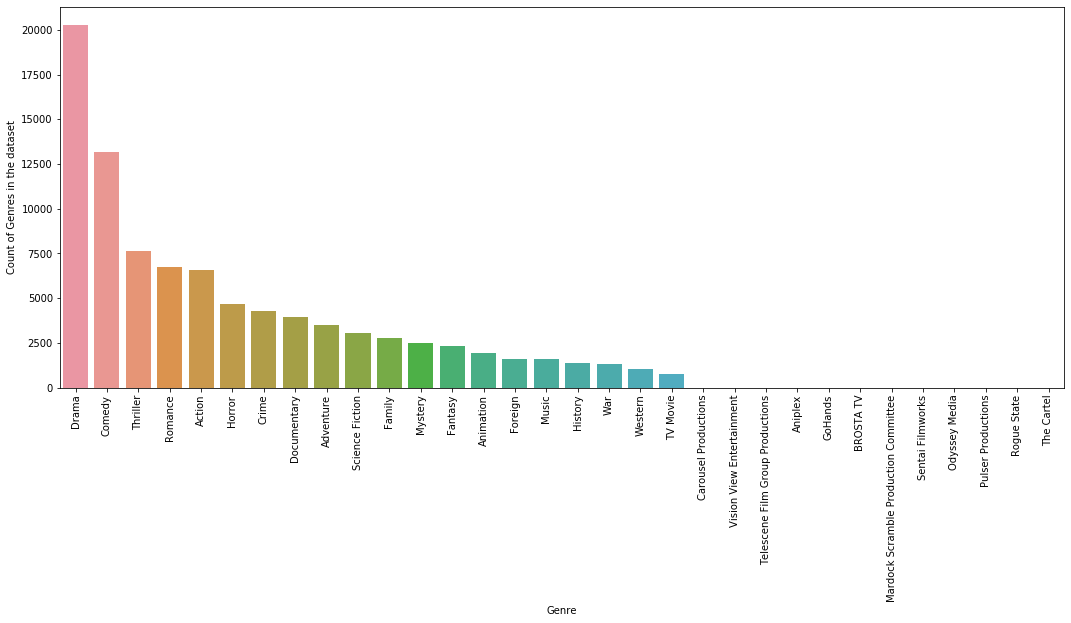

In [15]:
import seaborn as sns
x = ['Drama','Comedy','Thriller','Romance','Action','Horror','Crime','Documentary','Adventure','Science Fiction','Family','Mystery',
     'Fantasy','Animation','Foreign','Music','History','War','Western','TV Movie','Carousel Productions','Vision View Entertainment',
     'Telescene Film Group Productions','Aniplex','GoHands','BROSTA TV','Mardock Scramble Production Committee','Sentai Filmworks',
     'Odyssey Media','Pulser Productions','Rogue State','The Cartel']
plt.figure(figsize=(18,7))
ax=sns.barplot(x = "Genre",y = "Count",data = g)
ax.set(ylabel = 'Count of Genres in the dataset')
ax.set_xticklabels(labels = x ,rotation=90)
plt.show()

In [16]:
# e = final_data["Movie_name"].tolist()
# from textblob import TextBlob
# for i in tqdm_notebook(range(len(e))):
#     #print(e[i])
#     de_blob = TextBlob(e[i])
#     e[i] = de_blob.translate(to='en')
# Scratch - for converting the other languages to English Languages
# from textblob import TextBlob
# de_blob = TextBlob(u"Pasqualino Settebellezze")
# de_blob.detect_language()
# de_blob.translate(to='en')

In [17]:
data.dropna(subset = ['overview'],inplace=True,axis=0)

In [18]:
data['overview'].isnull().sum()

0

In [19]:
d = data["overview"].tolist()

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer 
from nltk.tokenize import word_tokenize
for i in tqdm_notebook(range(0,len(d))):
    d[i] = re.sub(r'[^\w]',r' ',d[i])
    d[i] = re.sub(r'[0-9]',r' ',d[i])
    d[i] = d[i].lower()
    d[i] = d[i].split()
    #porter = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    #lancaster = LancasterStemmer()
    d[i] = [lemmatizer.lemmatize(word) for word in d[i]]
    d[i] = " ".join(d[i])
    d[i] = word_tokenize(d[i])
    stop_words = stopwords.words('english')
    d[i] = [word for word in d[i] if word not in stop_words]
    d[i] = ' '.join(d[i])
data['clean_text'] = d

In [21]:
data['clean_text']

0        led woody andy toy live happily room andy birt...
1        sibling judy peter discover enchanted board ga...
2        family wedding reignites ancient feud next doo...
3        cheated mistreated stepped woman holding breat...
4        george bank ha recovered daughter wedding rece...
                               ...                        
45461                             rising falling man woman
45462    artist struggle finish work storyline cult pla...
45463    one hit go wrong professional assassin end sui...
45464    small town live two brother one minister one h...
45465    year decriminalisation homosexuality uk direct...
Name: clean_text, Length: 44512, dtype: object

In [22]:
final_data = data.loc[:, ['clean_text','genres']] 

In [23]:
final_data.head(3)

,clean_text,genres
0,led woody andy toy live happily room andy birt...,"[Animation, Comedy, Family]"
1,sibling judy peter discover enchanted board ga...,"[Adventure, Fantasy, Family]"
2,family wedding reignites ancient feud next doo...,"[Romance, Comedy]"


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb= MultiLabelBinarizer()

In [25]:
final_data = final_data.join(pd.DataFrame(mlb.fit_transform(final_data['genres']),columns=mlb.classes_,index=final_data.index))

In [26]:
final_data.drop(['genres'],axis=1,inplace=True)

In [27]:
final_data.head(3)

,clean_text,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,led woody andy toy live happily room andy birt...,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sibling judy peter discover enchanted board ga...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,family wedding reignites ancient feud next doo...,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
X = final_data['clean_text']
y = final_data.drop('clean_text',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
mn = OneVsRestClassifier(MultinomialNB())
dt = OneVsRestClassifier(DecisionTreeClassifier())
svc = OneVsRestClassifier(LinearSVC())

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
bow_vectorizer = CountVectorizer(max_features = 1000) 
bow_vectorizer.fit(final_data['clean_text'])
print('No. of feature_words in Bag_of_Words_Model : ', len(bow_vectorizer.get_feature_names()))
tfidf_Vectorizer = TfidfVectorizer(max_features = 1000)
tfidf_Vectorizer.fit(final_data['clean_text'])
print('No. of feature_words in Term_Frequency_Inverse_Document_Frequency_Model : ',len(tfidf_Vectorizer.get_feature_names()))

No. of feature_words in Bag_of_Words_Model :  1000
No. of feature_words in Term_Frequency_Inverse_Document_Frequency_Model :  1000


In [31]:
# Bag of Word Features
X_train_bow = bow_vectorizer.transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

### Multi-Nomial Naive-Bayes

In [32]:
mn.fit(X_train_bow,y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [33]:
d = mn.predict(X_train_bow)
s = mn.predict(X_test_bow)

In [34]:
from sklearn.metrics import f1_score
d1 = f1_score(y_train,d,average = 'weighted')
s1 = f1_score(y_test,s,average = 'weighted')
print("Train Score : ",d1)
print("Test Score : ",s1)

Train Score :  0.5233981910502429
Test Score :  0.503455693455436


### Decision Trees

In [35]:
dt.fit(X_train_bow,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                       

In [36]:
a = dt.predict(X_train_bow)
b = dt.predict(X_test_bow)

In [37]:
a1 = f1_score(y_train,a,average = 'weighted')
b1 = f1_score(y_test,b,average = 'weighted')
print("Train Score : ",a1)
print("Test Score : ",b1)

Train Score :  0.9975146604950713
Test Score :  0.35358160607156064


### Support Vector Machines

In [38]:
svc.fit(X_train_bow,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [39]:
z = svc.predict(X_train_bow)
x = svc.predict(X_test_bow)

In [40]:
z1 = f1_score(y_train,z,average = 'weighted')
x1 = f1_score(y_test,x,average = 'weighted')
print("Train Score : ",z1)
print("Test Score : ",x1)

Train Score :  0.4270498409612348
Test Score :  0.38967249600513126


### Models with Tf-Idf Features

In [41]:
X_train_tfidf = tfidf_Vectorizer.transform(X_train)
X_test_tfidf = tfidf_Vectorizer.transform(X_test)

### Multi-Nomial Navie Bayes

In [42]:
mn.fit(X_train_tfidf,y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [43]:
d = mn.predict(X_train_tfidf)
s = mn.predict(X_test_tfidf)

In [44]:
d1 = f1_score(y_train,d,average = 'weighted')
s1 = f1_score(y_test,s,average = 'weighted')
print("Train Score : ",d1)
print("Test Score : ",s1)

Train Score :  0.2472817847496965
Test Score :  0.23600654282321612


### Decision Tree

In [45]:
dt.fit(X_train_tfidf,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                       

In [46]:
a = dt.predict(X_train_tfidf)
b = dt.predict(X_test_tfidf)

In [47]:
a1 = f1_score(y_train,a,average = 'weighted')
b1 = f1_score(y_test,b,average = 'weighted')
print("Train Score : ",a1)
print("Test Score : ",b1)

Train Score :  0.9975008041561003
Test Score :  0.3571289104290178


### Linear SVC - Support Vector Classifier

In [48]:
svc.fit(X_train_tfidf,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [49]:
d = svc.predict(X_train_tfidf)
s = svc.predict(X_test_tfidf)

In [50]:
d1 = f1_score(y_train,d,average = 'weighted')
s1 = f1_score(y_test,s,average = 'weighted')
print("Train Score : ",d1)
print("Test Score : ",s1)

Train Score :  0.4326517426215597
Test Score :  0.40510219065242753
